In [9]:
# dataset prep one time
import os, shutil, pathlib
original_dir = pathlib.Path("./../data/PetImages")
new_basedir = pathlib.Path("./../data/PetImages/cat_vs_dog_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        newdir = new_basedir / subset_name / category
        os.makedirs(newdir, exist_ok=True)
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src= original_dir / category / fname,
                            dst = newdir / f"{fname}")

os.listdir(original_dir)

['Cat', 'cat_vs_dogs_small', 'Dog', 'cat_vs_dog_small']

In [11]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [68]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [69]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [59]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_basedir / "train",
    image_size=(180, 180),
    batch_size=32
)
val_dataset = image_dataset_from_directory(
    new_basedir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_basedir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [60]:
clean_train_dataset = train_dataset.ignore_errors()
clean_val_dataset = val_dataset.ignore_errors()
clean_test_dataset = test_dataset.ignore_errors()


In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="assets/convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    clean_train_dataset,
    epochs=30,
    validation_data=clean_val_dataset,
    callbacks=callbacks
)

Epoch 1/30
     63/Unknown - 3s 41ms/step - loss: 0.7345 - accuracy: 0.5288

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 4s 53ms/step - loss: 0.7345 - accuracy: 0.5288 - val_loss: 0.6906 - val_accuracy: 0.5430
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5548

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 50ms/step - loss: 0.6920 - accuracy: 0.5548 - val_loss: 0.6470 - val_accuracy: 0.6410
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.6183

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 50ms/step - loss: 0.6597 - accuracy: 0.6183 - val_loss: 0.6073 - val_accuracy: 0.6710
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.6758

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.6119 - accuracy: 0.6758 - val_loss: 0.6214 - val_accuracy: 0.6410
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.6903

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 53ms/step - loss: 0.5837 - accuracy: 0.6903 - val_loss: 0.6004 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.7189

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 4s 57ms/step - loss: 0.5546 - accuracy: 0.7189 - val_loss: 0.5840 - val_accuracy: 0.7080
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.7399

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.5242 - accuracy: 0.7399 - val_loss: 0.6046 - val_accuracy: 0.7060
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.7744

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.4727 - accuracy: 0.7744 - val_loss: 0.5999 - val_accuracy: 0.6970
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.8054

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.4336 - accuracy: 0.8054 - val_loss: 0.6971 - val_accuracy: 0.7230
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8194

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 48ms/step - loss: 0.3921 - accuracy: 0.8194 - val_loss: 0.6302 - val_accuracy: 0.7130
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.8459

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 49ms/step - loss: 0.3514 - accuracy: 0.8459 - val_loss: 0.7378 - val_accuracy: 0.6870
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8794

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 49ms/step - loss: 0.2871 - accuracy: 0.8794 - val_loss: 0.8850 - val_accuracy: 0.7190
Epoch 13/30
63/63 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.8984

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.2414 - accuracy: 0.8984 - val_loss: 0.8928 - val_accuracy: 0.7460
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9245

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.2107 - accuracy: 0.9245 - val_loss: 1.2883 - val_accuracy: 0.6570
Epoch 15/30
62/63 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9385

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 50ms/step - loss: 0.1714 - accuracy: 0.9390 - val_loss: 0.9914 - val_accuracy: 0.7240
Epoch 16/30
62/63 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9506

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 51ms/step - loss: 0.1408 - accuracy: 0.9505 - val_loss: 1.1279 - val_accuracy: 0.7340
Epoch 17/30
63/63 [==============================] - ETA: 0s - loss: 0.1242 - accuracy: 0.9560

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.1242 - accuracy: 0.9560 - val_loss: 1.2082 - val_accuracy: 0.7360
Epoch 18/30
63/63 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9680

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.1015 - accuracy: 0.9680 - val_loss: 1.1419 - val_accuracy: 0.7170
Epoch 19/30
63/63 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9795

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0703 - accuracy: 0.9795 - val_loss: 1.2603 - val_accuracy: 0.7410
Epoch 20/30
63/63 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9730

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0804 - accuracy: 0.9730 - val_loss: 1.4967 - val_accuracy: 0.7090
Epoch 21/30
63/63 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9800

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 1.6339 - val_accuracy: 0.7640
Epoch 22/30
63/63 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9760

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0568 - accuracy: 0.9760 - val_loss: 1.5116 - val_accuracy: 0.7430
Epoch 23/30
63/63 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9805

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0497 - accuracy: 0.9805 - val_loss: 2.2352 - val_accuracy: 0.7330
Epoch 24/30
63/63 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9840

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0450 - accuracy: 0.9840 - val_loss: 1.8599 - val_accuracy: 0.7400
Epoch 25/30
63/63 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9865

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 2.3099 - val_accuracy: 0.7370
Epoch 26/30
63/63 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9835

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 2.6449 - val_accuracy: 0.7250
Epoch 27/30
63/63 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9840

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 1.8578 - val_accuracy: 0.7540
Epoch 28/30
63/63 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9825

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 2.1306 - val_accuracy: 0.7230
Epoch 29/30
63/63 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9815

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0562 - accuracy: 0.9815 - val_loss: 1.8994 - val_accuracy: 0.7450
Epoch 30/30
63/63 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9910

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0611 - accuracy: 0.9910 - val_loss: 1.9940 - val_accuracy: 0.7400


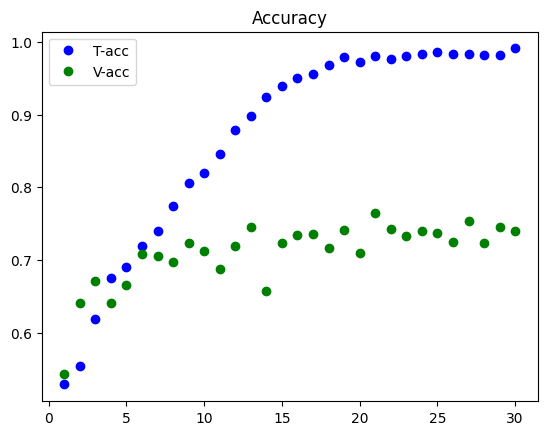

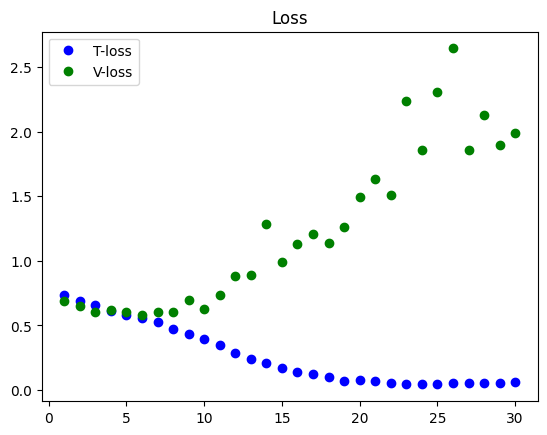

In [71]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="T-acc")
plt.plot(epochs, val_accuracy, "go", label="V-acc")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="T-loss")
plt.plot(epochs, val_loss, "go", label="V-loss")
plt.title("Loss")
plt.legend()
plt.show()

In [75]:
test_model = keras.models.load_model("assets/convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(clean_test_dataset)

     40/Unknown - 1s 12ms/step - loss: 0.6005 - accuracy: 0.7031

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


62/62 [==============================] - 1s 12ms/step - loss: 0.6087 - accuracy: 0.6988


In [77]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

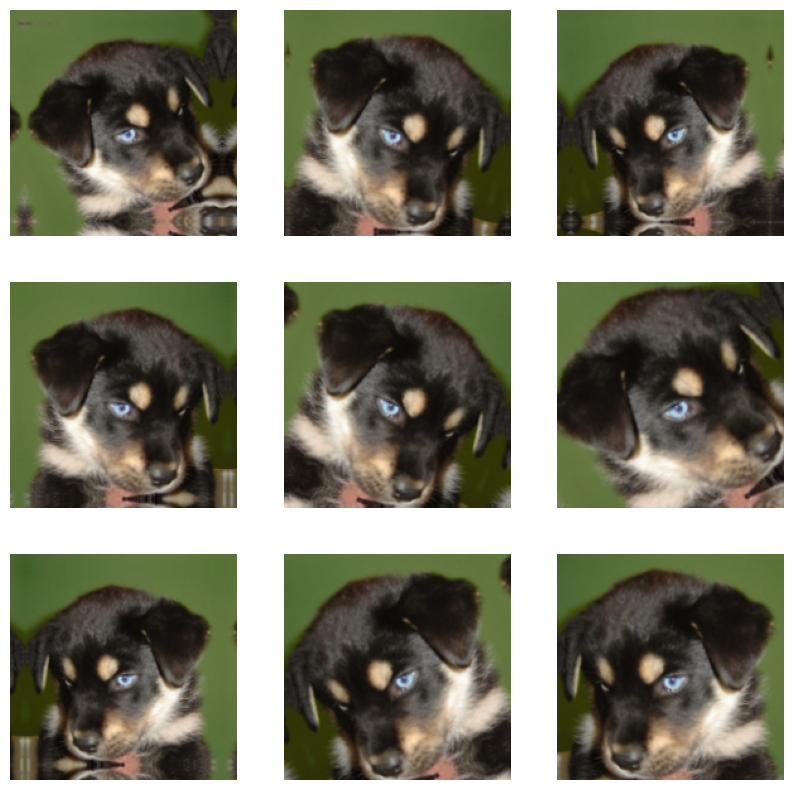

In [78]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [79]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [80]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="assets/convnet_with_data_aug",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    clean_train_dataset,
    epochs=100,
    validation_data=clean_val_dataset,
    callbacks=callbacks
)

Epoch 1/100
     63/Unknown - 4s 57ms/step - loss: 0.7728 - accuracy: 0.4992

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.7728 - accuracy: 0.4992 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/100
62/63 [============================>.] - ETA: 0s - loss: 0.7028 - accuracy: 0.5373

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.7027 - accuracy: 0.5363 - val_loss: 0.6843 - val_accuracy: 0.5390
Epoch 3/100
62/63 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5565

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.6921 - accuracy: 0.5573 - val_loss: 0.6814 - val_accuracy: 0.5990
Epoch 4/100
62/63 [============================>.] - ETA: 0s - loss: 0.6722 - accuracy: 0.5847

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.6723 - accuracy: 0.5848 - val_loss: 0.6594 - val_accuracy: 0.5990
Epoch 5/100
62/63 [============================>.] - ETA: 0s - loss: 0.6579 - accuracy: 0.6094

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.6564 - accuracy: 0.6103 - val_loss: 0.9399 - val_accuracy: 0.5550
Epoch 6/100
62/63 [============================>.] - ETA: 0s - loss: 0.6803 - accuracy: 0.6376

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.6784 - accuracy: 0.6398 - val_loss: 0.6496 - val_accuracy: 0.6520
Epoch 7/100
62/63 [============================>.] - ETA: 0s - loss: 0.6309 - accuracy: 0.6573

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.6316 - accuracy: 0.6563 - val_loss: 0.6584 - val_accuracy: 0.6150
Epoch 8/100
62/63 [============================>.] - ETA: 0s - loss: 0.6176 - accuracy: 0.6704

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.6164 - accuracy: 0.6708 - val_loss: 0.6613 - val_accuracy: 0.6420
Epoch 9/100
62/63 [============================>.] - ETA: 0s - loss: 0.5985 - accuracy: 0.6895

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.5987 - accuracy: 0.6898 - val_loss: 0.5707 - val_accuracy: 0.7240
Epoch 10/100
62/63 [============================>.] - ETA: 0s - loss: 0.5853 - accuracy: 0.6890

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 5s 72ms/step - loss: 0.5852 - accuracy: 0.6883 - val_loss: 0.5565 - val_accuracy: 0.7140
Epoch 11/100
62/63 [============================>.] - ETA: 0s - loss: 0.5835 - accuracy: 0.7056

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.5824 - accuracy: 0.7059 - val_loss: 0.5842 - val_accuracy: 0.6960
Epoch 12/100
62/63 [============================>.] - ETA: 0s - loss: 0.5732 - accuracy: 0.7258

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.5742 - accuracy: 0.7249 - val_loss: 0.5734 - val_accuracy: 0.6930
Epoch 13/100
62/63 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7525

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.5280 - accuracy: 0.7534 - val_loss: 0.6873 - val_accuracy: 0.6820
Epoch 14/100
62/63 [============================>.] - ETA: 0s - loss: 0.5284 - accuracy: 0.7288

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.5281 - accuracy: 0.7299 - val_loss: 0.6426 - val_accuracy: 0.6980
Epoch 15/100
62/63 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7419

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.5324 - accuracy: 0.7414 - val_loss: 0.5612 - val_accuracy: 0.7390
Epoch 16/100
62/63 [============================>.] - ETA: 0s - loss: 0.5164 - accuracy: 0.7581

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 70ms/step - loss: 0.5149 - accuracy: 0.7584 - val_loss: 0.5369 - val_accuracy: 0.7460
Epoch 17/100
62/63 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7666

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.4839 - accuracy: 0.7684 - val_loss: 0.5494 - val_accuracy: 0.7420
Epoch 18/100
62/63 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.7802

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.4759 - accuracy: 0.7804 - val_loss: 0.5377 - val_accuracy: 0.7710
Epoch 19/100
62/63 [============================>.] - ETA: 0s - loss: 0.4747 - accuracy: 0.7742

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.4742 - accuracy: 0.7744 - val_loss: 1.0566 - val_accuracy: 0.6670
Epoch 20/100
62/63 [============================>.] - ETA: 0s - loss: 0.4790 - accuracy: 0.7939

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 5s 71ms/step - loss: 0.4795 - accuracy: 0.7934 - val_loss: 0.4949 - val_accuracy: 0.7830
Epoch 21/100
62/63 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.7848

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.4676 - accuracy: 0.7844 - val_loss: 0.4787 - val_accuracy: 0.7840
Epoch 22/100
62/63 [============================>.] - ETA: 0s - loss: 0.4460 - accuracy: 0.7984

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.4455 - accuracy: 0.7994 - val_loss: 0.5038 - val_accuracy: 0.7720
Epoch 23/100
62/63 [============================>.] - ETA: 0s - loss: 0.4354 - accuracy: 0.8034

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.4355 - accuracy: 0.8029 - val_loss: 0.4857 - val_accuracy: 0.7900
Epoch 24/100
62/63 [============================>.] - ETA: 0s - loss: 0.4118 - accuracy: 0.8090

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.4112 - accuracy: 0.8094 - val_loss: 0.6818 - val_accuracy: 0.7430
Epoch 25/100
62/63 [============================>.] - ETA: 0s - loss: 0.4225 - accuracy: 0.8125

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.4220 - accuracy: 0.8124 - val_loss: 0.5082 - val_accuracy: 0.7990
Epoch 26/100
62/63 [============================>.] - ETA: 0s - loss: 0.4086 - accuracy: 0.8150

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.4091 - accuracy: 0.8144 - val_loss: 0.4590 - val_accuracy: 0.7960
Epoch 27/100
62/63 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.8357

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3902 - accuracy: 0.8359 - val_loss: 0.5956 - val_accuracy: 0.7700
Epoch 28/100
62/63 [============================>.] - ETA: 0s - loss: 0.4085 - accuracy: 0.8140

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.4086 - accuracy: 0.8139 - val_loss: 0.5161 - val_accuracy: 0.8000
Epoch 29/100
62/63 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8236

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3887 - accuracy: 0.8234 - val_loss: 0.5553 - val_accuracy: 0.7490
Epoch 30/100
62/63 [============================>.] - ETA: 0s - loss: 0.3813 - accuracy: 0.8301

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.3817 - accuracy: 0.8304 - val_loss: 0.6544 - val_accuracy: 0.7660
Epoch 31/100
62/63 [============================>.] - ETA: 0s - loss: 0.3800 - accuracy: 0.8382

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.3775 - accuracy: 0.8394 - val_loss: 0.5480 - val_accuracy: 0.7920
Epoch 32/100
62/63 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8347

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3733 - accuracy: 0.8354 - val_loss: 0.5859 - val_accuracy: 0.7870
Epoch 33/100
62/63 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.8498

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3458 - accuracy: 0.8499 - val_loss: 0.4740 - val_accuracy: 0.8140
Epoch 34/100
62/63 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8594

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.3490 - accuracy: 0.8604 - val_loss: 0.4232 - val_accuracy: 0.8290
Epoch 35/100
62/63 [============================>.] - ETA: 0s - loss: 0.3487 - accuracy: 0.8417

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3466 - accuracy: 0.8429 - val_loss: 0.5646 - val_accuracy: 0.8170
Epoch 36/100
62/63 [============================>.] - ETA: 0s - loss: 0.3275 - accuracy: 0.8558

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3257 - accuracy: 0.8569 - val_loss: 0.4688 - val_accuracy: 0.8380
Epoch 37/100
62/63 [============================>.] - ETA: 0s - loss: 0.3419 - accuracy: 0.8624

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.3404 - accuracy: 0.8629 - val_loss: 0.4509 - val_accuracy: 0.8320
Epoch 38/100
62/63 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.8735

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.3129 - accuracy: 0.8739 - val_loss: 0.4187 - val_accuracy: 0.8310
Epoch 39/100
62/63 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8710

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.3133 - accuracy: 0.8714 - val_loss: 0.4926 - val_accuracy: 0.8310
Epoch 40/100
62/63 [============================>.] - ETA: 0s - loss: 0.3108 - accuracy: 0.8634

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.3097 - accuracy: 0.8639 - val_loss: 0.4708 - val_accuracy: 0.8320
Epoch 41/100
62/63 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8770

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.3135 - accuracy: 0.8774 - val_loss: 0.5008 - val_accuracy: 0.8180
Epoch 42/100
62/63 [============================>.] - ETA: 0s - loss: 0.3056 - accuracy: 0.8674

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.3067 - accuracy: 0.8664 - val_loss: 0.6471 - val_accuracy: 0.7950
Epoch 43/100
62/63 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8790

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2938 - accuracy: 0.8794 - val_loss: 0.5685 - val_accuracy: 0.8230
Epoch 44/100
62/63 [============================>.] - ETA: 0s - loss: 0.3006 - accuracy: 0.8700

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2990 - accuracy: 0.8709 - val_loss: 0.5642 - val_accuracy: 0.8320
Epoch 45/100
62/63 [============================>.] - ETA: 0s - loss: 0.2915 - accuracy: 0.8780

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 61ms/step - loss: 0.2916 - accuracy: 0.8779 - val_loss: 0.6441 - val_accuracy: 0.7620
Epoch 46/100
62/63 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8861

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2931 - accuracy: 0.8864 - val_loss: 0.4679 - val_accuracy: 0.8240
Epoch 47/100
62/63 [============================>.] - ETA: 0s - loss: 0.2870 - accuracy: 0.8851

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 64ms/step - loss: 0.2869 - accuracy: 0.8849 - val_loss: 0.5350 - val_accuracy: 0.8180
Epoch 48/100
62/63 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8775

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2824 - accuracy: 0.8774 - val_loss: 0.6730 - val_accuracy: 0.8150
Epoch 49/100
62/63 [============================>.] - ETA: 0s - loss: 0.2718 - accuracy: 0.8931

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2706 - accuracy: 0.8939 - val_loss: 0.5389 - val_accuracy: 0.8200
Epoch 50/100
62/63 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.8972

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2647 - accuracy: 0.8979 - val_loss: 0.6595 - val_accuracy: 0.8300
Epoch 51/100
62/63 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8942

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2792 - accuracy: 0.8944 - val_loss: 0.5647 - val_accuracy: 0.8280
Epoch 52/100
62/63 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8947

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 63ms/step - loss: 0.2520 - accuracy: 0.8954 - val_loss: 0.5956 - val_accuracy: 0.8430
Epoch 53/100
62/63 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9093

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2311 - accuracy: 0.9090 - val_loss: 0.6803 - val_accuracy: 0.7950
Epoch 54/100
62/63 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9042

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2373 - accuracy: 0.9045 - val_loss: 0.5376 - val_accuracy: 0.8150
Epoch 55/100
62/63 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.8891

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2505 - accuracy: 0.8869 - val_loss: 0.6184 - val_accuracy: 0.8160
Epoch 56/100
62/63 [============================>.] - ETA: 0s - loss: 0.2450 - accuracy: 0.9052

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


INFO:tensorflow:Assets written to: assets/convnet_with_data_aug/assets


63/63 [==============================] - 4s 69ms/step - loss: 0.2447 - accuracy: 0.9050 - val_loss: 0.4149 - val_accuracy: 0.8490
Epoch 57/100
62/63 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9007

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2367 - accuracy: 0.9015 - val_loss: 0.7933 - val_accuracy: 0.8300
Epoch 58/100
62/63 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9244

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2040 - accuracy: 0.9240 - val_loss: 0.6753 - val_accuracy: 0.8130
Epoch 59/100
62/63 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9103

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2238 - accuracy: 0.9105 - val_loss: 0.5883 - val_accuracy: 0.8510
Epoch 60/100
62/63 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.9073

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2477 - accuracy: 0.9075 - val_loss: 0.7808 - val_accuracy: 0.7970
Epoch 61/100
62/63 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9123

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2095 - accuracy: 0.9125 - val_loss: 0.6920 - val_accuracy: 0.8310
Epoch 62/100
62/63 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9153

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1999 - accuracy: 0.9150 - val_loss: 0.5267 - val_accuracy: 0.8440
Epoch 63/100
62/63 [============================>.] - ETA: 0s - loss: 0.2102 - accuracy: 0.9158

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2091 - accuracy: 0.9165 - val_loss: 0.5153 - val_accuracy: 0.8560
Epoch 64/100
62/63 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9098

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2274 - accuracy: 0.9095 - val_loss: 0.4961 - val_accuracy: 0.8500
Epoch 65/100
62/63 [============================>.] - ETA: 0s - loss: 0.1983 - accuracy: 0.9148

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1982 - accuracy: 0.9150 - val_loss: 0.5164 - val_accuracy: 0.8560
Epoch 66/100
62/63 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9183

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2001 - accuracy: 0.9190 - val_loss: 0.5558 - val_accuracy: 0.8560
Epoch 67/100
62/63 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9178

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1920 - accuracy: 0.9185 - val_loss: 0.5970 - val_accuracy: 0.8370
Epoch 68/100
62/63 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9173

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2105 - accuracy: 0.9175 - val_loss: 0.6212 - val_accuracy: 0.8340
Epoch 69/100
62/63 [============================>.] - ETA: 0s - loss: 0.1903 - accuracy: 0.9239

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1891 - accuracy: 0.9245 - val_loss: 0.7192 - val_accuracy: 0.8390
Epoch 70/100
62/63 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9244

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1790 - accuracy: 0.9250 - val_loss: 0.5542 - val_accuracy: 0.8510
Epoch 71/100
62/63 [============================>.] - ETA: 0s - loss: 0.2027 - accuracy: 0.9284

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2013 - accuracy: 0.9290 - val_loss: 0.6657 - val_accuracy: 0.8520
Epoch 72/100
62/63 [============================>.] - ETA: 0s - loss: 0.1676 - accuracy: 0.9340

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1668 - accuracy: 0.9340 - val_loss: 0.7254 - val_accuracy: 0.8470
Epoch 73/100
62/63 [============================>.] - ETA: 0s - loss: 0.1951 - accuracy: 0.9249

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1938 - accuracy: 0.9255 - val_loss: 0.5720 - val_accuracy: 0.8620
Epoch 74/100
62/63 [============================>.] - ETA: 0s - loss: 0.1854 - accuracy: 0.9279

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1865 - accuracy: 0.9280 - val_loss: 0.6352 - val_accuracy: 0.8170
Epoch 75/100
62/63 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9304

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1995 - accuracy: 0.9310 - val_loss: 0.7718 - val_accuracy: 0.8510
Epoch 76/100
62/63 [============================>.] - ETA: 0s - loss: 0.2090 - accuracy: 0.9304

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2080 - accuracy: 0.9305 - val_loss: 0.7088 - val_accuracy: 0.8510
Epoch 77/100
62/63 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9294

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1983 - accuracy: 0.9285 - val_loss: 0.6404 - val_accuracy: 0.8470
Epoch 78/100
62/63 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9244

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1872 - accuracy: 0.9245 - val_loss: 0.5269 - val_accuracy: 0.8580
Epoch 79/100
62/63 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.9375

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.5514 - val_accuracy: 0.8480
Epoch 80/100
62/63 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9284

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1979 - accuracy: 0.9285 - val_loss: 0.5133 - val_accuracy: 0.8670
Epoch 81/100
62/63 [============================>.] - ETA: 0s - loss: 0.1757 - accuracy: 0.9390

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1771 - accuracy: 0.9390 - val_loss: 0.6211 - val_accuracy: 0.8310
Epoch 82/100
62/63 [============================>.] - ETA: 0s - loss: 0.1932 - accuracy: 0.9309

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1924 - accuracy: 0.9310 - val_loss: 2.8613 - val_accuracy: 0.7290
Epoch 83/100
62/63 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9340

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1878 - accuracy: 0.9340 - val_loss: 1.0641 - val_accuracy: 0.8130
Epoch 84/100
62/63 [============================>.] - ETA: 0s - loss: 0.1452 - accuracy: 0.9486

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1449 - accuracy: 0.9485 - val_loss: 2.1329 - val_accuracy: 0.7630
Epoch 85/100
62/63 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9325

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1950 - accuracy: 0.9330 - val_loss: 0.5337 - val_accuracy: 0.8750
Epoch 86/100
62/63 [============================>.] - ETA: 0s - loss: 0.1753 - accuracy: 0.9390

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1783 - accuracy: 0.9380 - val_loss: 0.6415 - val_accuracy: 0.8470
Epoch 87/100
62/63 [============================>.] - ETA: 0s - loss: 0.1676 - accuracy: 0.9375

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1667 - accuracy: 0.9380 - val_loss: 0.6533 - val_accuracy: 0.8490
Epoch 88/100
62/63 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9355

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1897 - accuracy: 0.9350 - val_loss: 0.5850 - val_accuracy: 0.8610
Epoch 89/100
62/63 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9425

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1672 - accuracy: 0.9430 - val_loss: 0.7151 - val_accuracy: 0.8440
Epoch 90/100
62/63 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9425

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1707 - accuracy: 0.9430 - val_loss: 0.6365 - val_accuracy: 0.8570
Epoch 91/100
62/63 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.9330

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1787 - accuracy: 0.9335 - val_loss: 0.6793 - val_accuracy: 0.8460
Epoch 92/100
62/63 [============================>.] - ETA: 0s - loss: 0.1988 - accuracy: 0.9345

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1988 - accuracy: 0.9345 - val_loss: 0.6536 - val_accuracy: 0.8550
Epoch 93/100
62/63 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9415

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1741 - accuracy: 0.9415 - val_loss: 0.7068 - val_accuracy: 0.8470
Epoch 94/100
62/63 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9234

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2216 - accuracy: 0.9235 - val_loss: 0.6421 - val_accuracy: 0.8580
Epoch 95/100
62/63 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9279

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1897 - accuracy: 0.9285 - val_loss: 0.7840 - val_accuracy: 0.8550
Epoch 96/100
62/63 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9294

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.2055 - accuracy: 0.9300 - val_loss: 0.5915 - val_accuracy: 0.8410
Epoch 97/100
62/63 [============================>.] - ETA: 0s - loss: 0.1922 - accuracy: 0.9340

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1914 - accuracy: 0.9345 - val_loss: 0.6696 - val_accuracy: 0.8610
Epoch 98/100
62/63 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9476

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1446 - accuracy: 0.9475 - val_loss: 0.9681 - val_accuracy: 0.8470
Epoch 99/100
62/63 [============================>.] - ETA: 0s - loss: 0.1846 - accuracy: 0.9390

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1836 - accuracy: 0.9395 - val_loss: 0.6794 - val_accuracy: 0.8390
Epoch 100/100
62/63 [============================>.] - ETA: 0s - loss: 0.1709 - accuracy: 0.9410

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 4s 62ms/step - loss: 0.1696 - accuracy: 0.9415 - val_loss: 0.6802 - val_accuracy: 0.8580


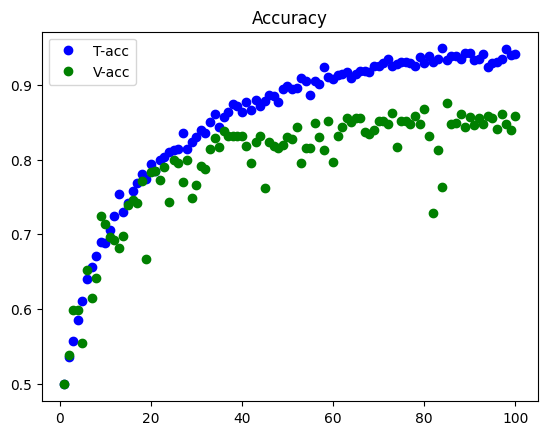

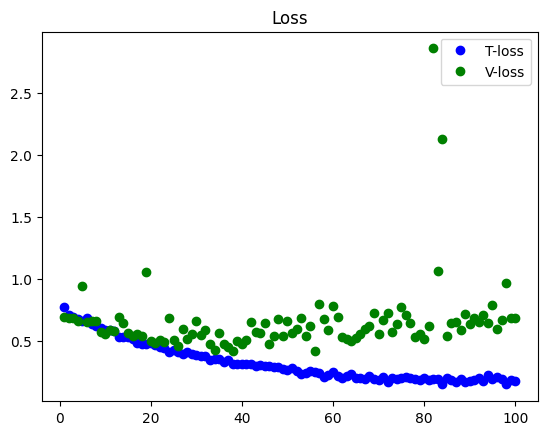

In [82]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="T-acc")
plt.plot(epochs, val_accuracy, "go", label="V-acc")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="T-loss")
plt.plot(epochs, val_loss, "go", label="V-loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("assets/convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(clean_test_dataset)